# Setup Kaggle


In [1]:
!pip install -q kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"emeriokevin","key":"690b2ef241e1170bc9e8eb65e94a4534"}'}

In [3]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [4]:
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle datasets download -d iammustafatz/diabetes-prediction-dataset

  0% 0.00/734k [00:00<?, ?B/s]
100% 734k/734k [00:00<00:00, 139MB/s]


In [6]:
!mkdir train

In [7]:
!unzip diabetes-prediction-dataset.zip -d train

Archive:  diabetes-prediction-dataset.zip
  inflating: train/diabetes_prediction_dataset.csv  


# Data Preprocessing

Impor modul

In [8]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer

Loading data

In [9]:
diabetes = pd.read_csv('./train/diabetes_prediction_dataset.csv')
diabetes.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


Ubah nilai non-numerik menjadi numerik

In [10]:
smoking_history_dict = {
    'never': 0,
    'former': 1,
    'current': 2,
    'not current': 1,
    'ever': 1
}

diabetes['smoking_history'] = diabetes.smoking_history.map(smoking_history_dict)

gender_dict = {'Female': 0, 'Male': 1}

diabetes['gender'] = diabetes.gender.map(gender_dict)

diabetes.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0.0,80.0,0,1,0.0,25.19,6.6,140,0
1,0.0,54.0,0,0,NaN,27.32,6.6,80,0
2,1.0,28.0,0,0,0.0,27.32,5.7,158,0
3,0.0,36.0,0,0,2.0,23.45,5.0,155,0
4,1.0,76.0,1,1,2.0,20.14,4.8,155,0


Check Missing Value

In [11]:
diabetes.isnull().sum()

gender                    18
age                        0
hypertension               0
heart_disease              0
smoking_history        35816
bmi                        0
HbA1c_level                0
blood_glucose_level        0
diabetes                   0
dtype: int64

In [12]:
mode_imputer = SimpleImputer(strategy='most_frequent')
diabetes['smoking_history'] = mode_imputer.fit_transform(
    diabetes[['smoking_history']]
)
diabetes['gender'] = mode_imputer.fit_transform(diabetes[['gender']])

diabetes = pd.DataFrame(diabetes, columns=['gender', 'age', 'hypertension',
                                           'heart_disease', 'smoking_history',
                                           'bmi', 'HbA1c_level',
                                           'blood_glucose_level', 'diabetes'])

diabetes.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0.0,80.0,0,1,0.0,25.19,6.6,140,0
1,0.0,54.0,0,0,0.0,27.32,6.6,80,0
2,1.0,28.0,0,0,0.0,27.32,5.7,158,0
3,0.0,36.0,0,0,2.0,23.45,5.0,155,0
4,1.0,76.0,1,1,2.0,20.14,4.8,155,0


Feature Selection

In [13]:
data_n = 100000
diabetes = diabetes.sample(n=data_n, random_state=1)
feature_cols = ['gender', 'age', 'hypertension', 'heart_disease',
                'smoking_history',  'bmi', 'HbA1c_level',
                'blood_glucose_level']
X = diabetes[feature_cols]
y = diabetes['diabetes']
print(X.shape)
X.head()

(100000, 8)


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
43660,0.0,73.0,0,0,0.0,26.62,5.0,155
87278,0.0,35.0,0,0,0.0,27.32,4.5,130
14317,1.0,38.0,0,0,0.0,27.32,6.2,130
81932,0.0,75.0,0,0,0.0,31.11,6.2,159
95321,0.0,51.0,0,0,0.0,39.57,6.2,240


Normalisasi

In [14]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

X = pd.DataFrame(X, columns=['gender', 'age', 'hypertension',
                                           'heart_disease', 'smoking_history',
                                           'bmi', 'HbA1c_level',
                                           'blood_glucose_level'])
X.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
0,0.0,0.912412,0.0,0.0,0.0,0.193861,0.272727,0.340909
1,0.0,0.436937,0.0,0.0,0.0,0.202031,0.181818,0.227273
2,1.0,0.474474,0.0,0.0,0.0,0.202031,0.490909,0.227273
3,0.0,0.937437,0.0,0.0,0.0,0.246265,0.490909,0.359091
4,0.0,0.637137,0.0,0.0,0.0,0.345005,0.490909,0.727273


Split Data

In [15]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1) # 70% training and 30% test

# Making the Tree

Bandingkan kedalaman pohon

In [16]:
print('{:^10}{:^20}{:^20}'.format('depth', 'train accuracy', 'valid accuracy'))
for i in range (1, 31) :
  clf = DecisionTreeClassifier(criterion="entropy", max_depth=i)
  clf = clf.fit(X_train, y_train)
  y_pred = clf.predict(X_train)
  accuracy_train = metrics.accuracy_score(y_train, y_pred)
  y_pred = clf.predict(X_test)
  accuracy_test = metrics.accuracy_score(y_test, y_pred)
  print('{:^10}{:^20.5}{:^20.5}'.format(str(i), str(accuracy_train),
                                        str(accuracy_test)))

  depth      train accuracy      valid accuracy   
    1            0.954               0.953        
    2            0.971               0.971        
    3            0.971               0.971        
    4            0.971               0.971        
    5            0.971               0.971        
    6            0.971               0.971        
    7            0.971               0.971        
    8            0.972               0.971        
    9            0.972               0.971        
    10           0.972               0.971        
    11           0.972               0.970        
    12           0.973               0.970        
    13           0.974               0.969        
    14           0.975               0.968        
    15           0.977               0.968        
    16           0.978               0.966        
    17           0.980               0.964        
    18           0.983               0.963        
    19           0.985         

Buat pohon terbaik

In [17]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=2)

# Train Decision Tree Classifer
clf = clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.9715


Visualisasikan pohon

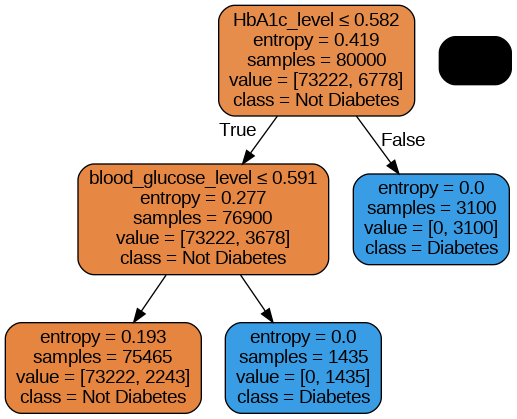

In [18]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,
                class_names=['Not Diabetes', 'Diabetes'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes.png')
Image(graph.create_png())


# Applying the Model

In [20]:

def predict_user_input():
    user_data = pd.DataFrame(columns=['gender', 'age', 'hypertension',
                                      'heart_disease', 'smoking_history', 'bmi',
                                      'HbA1c_level', 'blood_glucose_level'])

    for column in user_data.columns:
        if column == 'gender':
            user_input = input(f'Enter the value for {column} (0 for Female, 1 for Male): ')
        elif column == 'hypertension' or column == 'heart_disease':
            user_input = input(f'Enter the value for {column} (0 if you don\'t have, 1 if you have) : ')
        elif column == 'smoking_history':
            user_input = input(f'Enter the value for {column} (0 if you don\'t smoke, 1 if you an former/ever smoke, 2 if you an active smoker) : ')
        else:
            user_input = input(f'Enter the value for {column} : ')

        user_data.at[0, column] = float(user_input)

    user_data = user_data.apply(pd.to_numeric, errors='coerce')

    # Normalize the user data using the fitted scaler
    user_data_scaled_array = scaler.transform(user_data.values.reshape(1, -1))

    user_prediction = clf.predict(user_data_scaled_array)
    prediction = 'Diabetes' if user_prediction[0] == 1 else 'Not Diabetes'

    print(user_data_scaled_array)
    print(user_prediction)
    print(f'Prediction result : {prediction}')

predict_user_input()

Enter the value for gender (0 for Female, 1 for Male): 1
Enter the value for age : 1
Enter the value for hypertension (0 if you don't have, 1 if you have) : 1
Enter the value for heart_disease (0 if you don't have, 1 if you have) : 1
Enter the value for smoking_history (0 if you don't smoke, 1 if you an former/ever smoke, 2 if you an active smoker) : 1
Enter the value for bmi : 30
Enter the value for HbA1c_level : 9
Enter the value for blood_glucose_level : 200
[[1.         0.01151151 1.         1.         0.5        0.23330999
  1.         0.54545455]]
[1]
Prediction result : Diabetes


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [ ]:
print(X)

       gender       age  hypertension  heart_disease  smoking_history  \
0         0.0  0.912412           0.0            0.0              0.0   
1         0.0  0.436937           0.0            0.0              0.0   
2         1.0  0.474474           0.0            0.0              0.0   
3         0.0  0.937437           0.0            0.0              0.0   
4         0.0  0.637137           0.0            0.0              0.0   
...       ...       ...           ...            ...              ...   
99995     0.0  0.449449           0.0            0.0              0.0   
99996     0.0  0.224224           0.0            0.0              0.0   
99997     1.0  1.000000           1.0            0.0              0.5   
99998     0.0  0.637137           1.0            0.0              0.5   
99999     0.0  0.987487           0.0            0.0              0.0   

            bmi  HbA1c_level  blood_glucose_level  
0      0.193861     0.272727             0.340909  
1      0.202031    

In [21]:
import pickle
pickle.dump(clf, open("model.pkl","wb"))